## Importing Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, confusion_matrix
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


## 1. Background and Objective

The primary objective for this project is to utilize American Sign Language (ASL) data set which is provided by MNIST and implement classification through Convolutional Neural Network (CNN) by training CNN model and predict corresponding alphabet of a sign language symbols.

### 1.1. Summary of the Data
The dataset format is patterned to match closely with the classic MNIST. Each Training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (cases for 9=J and 25=Z has been excluded due to gesture motions). The dataset contains 27455 training images and 7172 test images all with a shape of 28 by 28 pixels. The data is approximately half the size of the standard MNIST but represents similar structure with header row of label and single 28x28 pixel image with gray scale values between 0-255. The dataset is in CSV format where training data has 27455 rows and 785 columns and which first column of the dataset represents the class label of the image and the remaining 784 columns represents the pixels.

### 1.2. Reading dataset

In [2]:
train_df = pd.read_csv(r"../data/sign_mnist_train/sign_mnist_train.csv")

In [3]:
test_df = pd.read_csv(r"../data/sign_mnist_test/sign_mnist_test.csv")

### 1.3. Inspecting the shape of the data

In [4]:
train_df.shape

(27455, 785)

In [5]:
test_df.shape

(7172, 785)

In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


The dataset is combined with labels for the corresponding sign with 784 (28x28) pixel values representing an image. As it can be seen in the above shape of the data, training data contains 27455 images while test data contains 7172 images in total.

### 1.4. Sign Language Image
The colored image of 24 static signs of ASL is represented in below Figure:

(-0.5, 664.5, 470.5, -0.5)

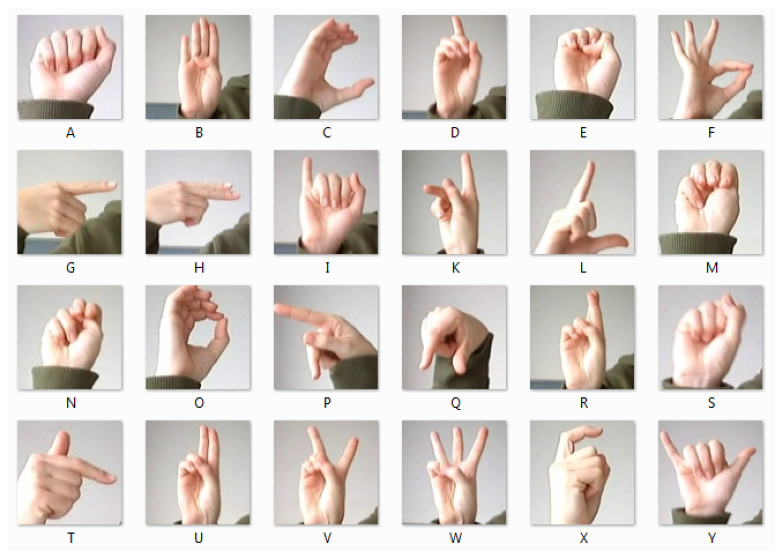

In [7]:
plt.figure(figsize=(15,10))
plt.imshow(Image.open(r"C:/Users/dongh/Desktop/Springboard/Capstone-Project-II/data/amer_sign2.png"))
plt.axis('off')

## 2. Data Pre-processing

### 2.1. Data labelling

In [8]:
train_y = train_df['label']
test_y = test_df['label']
train_x = train_df.drop(['label'],axis=1)
test_x = test_df.drop(['label'],axis=1)

### 2.2. Data Conversion and scaling

In order to train the model, the data must be processed and be available for training, validating and testing phases.
The pixel values of the dataset is presented between 0-255 however, for better performance of the model, the data has been scaled to between values of 0-1 and convert it into 28x28 image and verified on the shape for the training and test data set.
This stage is also reshaping the data to make images available for data augmentation with ImageDataGenerator at later stage. The train data is reshaped in with reshape(number of rows, image width, image height, channels)

In [9]:
X_train = train_x.values.reshape(-1, 28, 28, 1)
X_test = test_x.values.reshape(-1, 28, 28, 1)

In [10]:
print(X_train.shape)
print(train_y.shape)
print(X_test.shape)
print(test_y.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


### 2.3. Splitting training data
The training dataset has been splitted to produce Validation set. The validation set is created in order to seperate test set completely from hypothesis and evaulation of the model thus the performance of the model provides an unbiased sense of model effectiveness. The training set contains 21964 images while the validation set contains 5491 images.

In [11]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, train_y, test_size= 0.2, random_state=42)

In [12]:
print(X_train.shape)
print(X_validate.shape)
print(Y_train.shape)
print(Y_validate.shape)

(21964, 28, 28, 1)
(5491, 28, 28, 1)
(21964,)
(5491,)


## 3. Data Visualization

### 3.1. Specifying class labels
In order for better visualization and for better definition of the the labels, the class labels (numbers) have been specified to it's associated alphabets by utilizing dictionary.

In [13]:
labels_list = train_y.unique()
labels_list = np.sort(labels_list)
print(labels_list)

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [14]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
letters = {}

for i,j in enumerate(alphabet):
    letters[j] = i
letters = {x:y for y,x in letters.items()}

### 3.2. Sample images

Function have been defined to take in images array as input and to display 10 sample images of training and test data set.

In [15]:
def show_images(images, labels):
    fig, ax=plt.subplots(2,5)
    fig.set_size_inches(10,6)
    k=0
    for i in range(2):
        for j in range(5):
            ax[i,j].imshow(images[k], cmap='gray')
            ax[i,j].set_title(letters[labels[k]])
            k=k+1;
        plt.tight_layout()

#### 3.2.1. Preview of first 10 Training set images

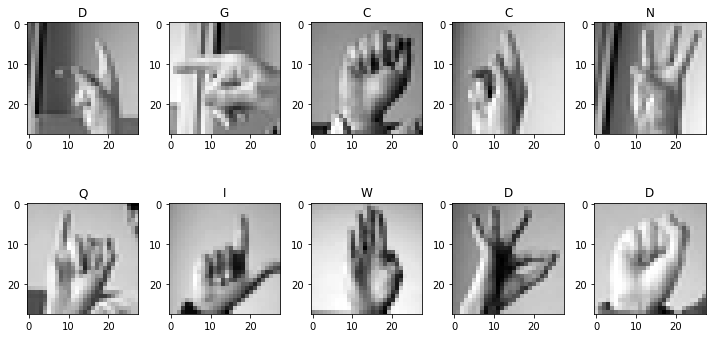

In [16]:
show_images(X_train, train_y)

#### 3.2.2. Preview of first 10 Test set images

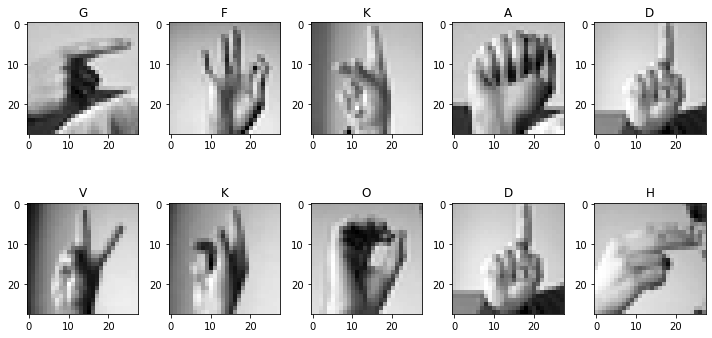

In [17]:
show_images(X_test, test_y)

### 3.3. Visualization of the data

#### 3.3.1. Total training dataset

<AxesSubplot:xlabel='label', ylabel='count'>

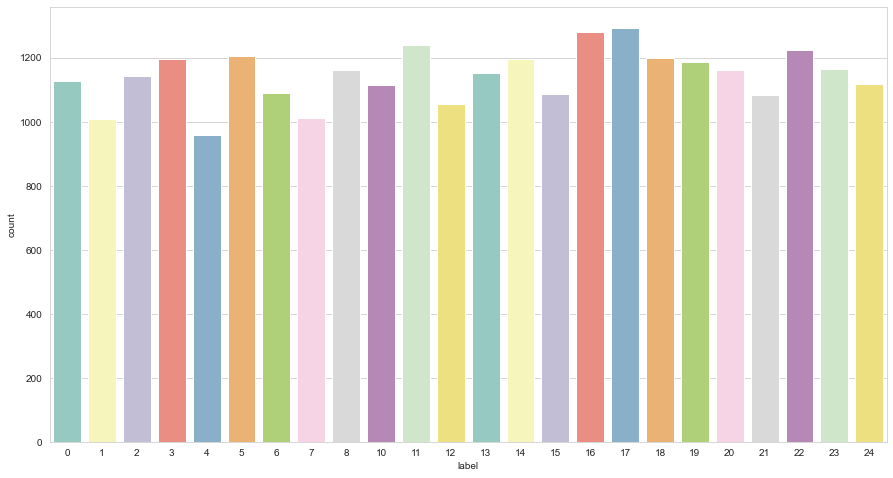

In [18]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(x='label', data=train_df, palette='Set3')

First bar chart represents the overall layout of each class labels in the total training dataset. As it can be observed, all class labels are counted upto nearly 1000 examples. This specifies that the dataset is well balanced overall and does not suffer from an imbalance issue. Data can be utlized with assumption of an equal number of examples in each class for classification.

#### 3.3.2. Training dataset

C:\Users\dongh\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

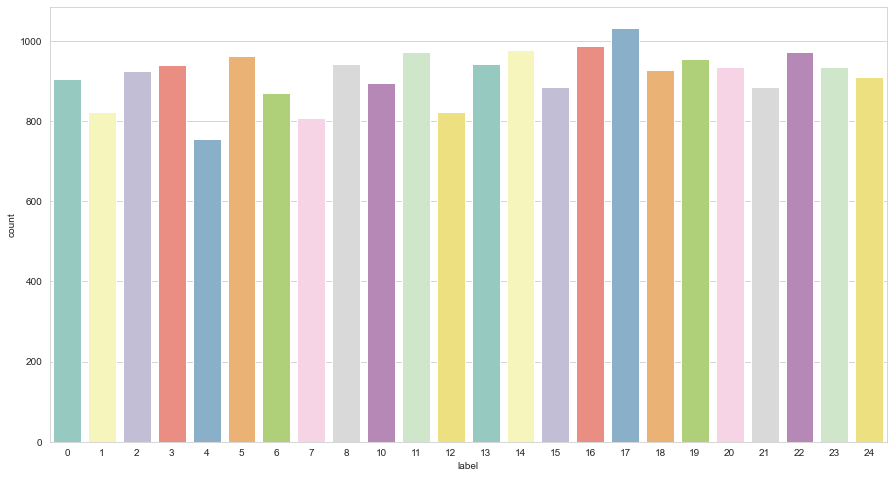

In [19]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(Y_train, palette='Set3')

The above bar chart presents the layout of class labels in training set after train-validate split. This specifies that overall class labels are well balanced even after the split. However, few labels such as 4 and 17 reveals slight difference in the counts. class label 17 is observed to be more abundant in number of examples while label 4 is in short supply in number of examples compared to neighboring labels.

#### 3.3.3. Validation dataset

C:\Users\dongh\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

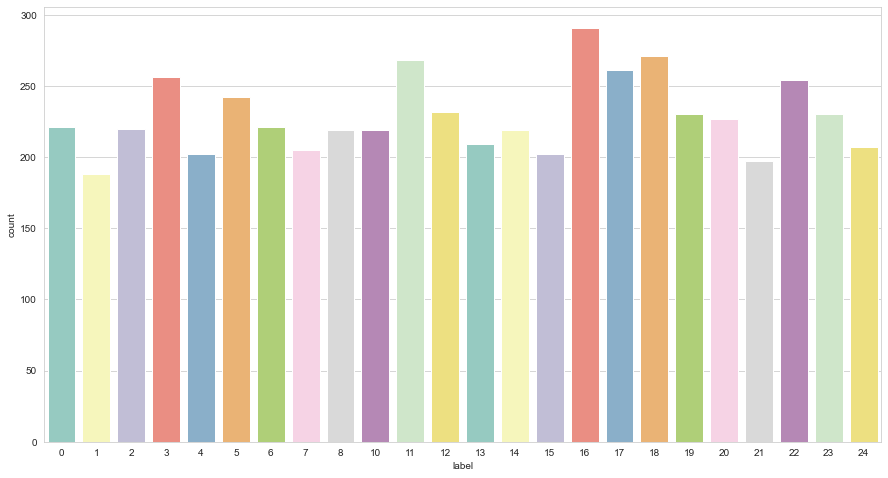

In [20]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(Y_validate, palette='Set3')

Similar to chart for training set, Validation set is can be observed to contain well balanced number of examples throughout the class labels. 

## 4. Data Augmentation
Data Augmentation is technique/strategy to significantly increase the diversity of the data available for training the models by adding modified copies of already existing data without collecting new data. It utilizes techniques such as cropping, padding, height and width modification and horizontal flipping to create transformed image set and thus increasing the amount of relevant data and artificially expand the dataset. This acts as regularizer and helps to reduce overfitting when training the model.

In Keras data augmentation can be processed through ImageDataGenerator class which first, allows to configure random transformations and normalization operations on the image data during training and second, instantiate generators of augmented image batches (and their labels) via .flow(data, labels). These generators can be used with Keras model methods that accepts data generators as inputs.

The first input has following transformation:
- rescale is a value by which we will multiply the data before any other processing. The original images consist in RGB coefficients in the 0-255, but such values would be too high for the models to process (given a typical learning rate), therefore, I scaled the values between 0 and 1 by 1/255 of factor. 
- rotation_range is a value in degree(0-180), a range within which to randomly rotate pictures.
- zoom_range is for rnadomly zooming inside pictures
- height_shift_range and width_shift_range are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- horizontal_flip is used to randomly flip half of the images horizontally

In [21]:
train_datagen1 = ImageDataGenerator(rescale=1/255, rotation_range=20, zoom_range=0.2, height_shift_range=0.2, width_shift_range=0.2,
                    horizontal_flip=True)
valid_datagen1 = ImageDataGenerator(rescale=1/255)
test_datagen1 = ImageDataGenerator(rescale=1/255)

## 5. Building First Model

The model type utilized for the project is Sequential. The sequential API allows to create models layer-by-layer and is the esiest way to build the model in Keras.

#### Conv2D layer
The first layer is Conv2D layer which creates convolution kernel that is convolved with the layer input to produce a tensor of outputs. This layer comprehends the input images with expectation of input samples with the shape of [columns, rows, channels]. The input in this case is contrained to 28,28,1 which defines 28x28 pixel image with a single channel (grayscale). 
Kernel size is the size of the filter matrix for the convolution and in this case we have 3x3 filter matrix and the number of nodes is set to 32.
ReLU function is used for the activation function. Rectified Linear Unit (ReLU) is the most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value x it returns that value back. 
#### MaxPooling2D layer
Pooling layer is then added after a nonlinearity (e.g ReLU) has been applied to the feature maps output by a convolutional layer. Pooling involves selecting a pooling operation, much like a filter to be applied to feature maps. The size of the pooling operation is 2x2 pixels applied with stride of 2 pixels and is smaller than the size of the feature map. Thus the pooling layer will always reduce the size of each feature map by a factor of 2. For this project, Max Pooling(MaxPooling2D) has been applied which calculates the maximum value for each patch of the feature map.
The step is repeated with the second Conv2D layer with number of nodes of 64 and second Max Pooling layer.
In between the Cov2D layer and Dense layer, I have applied Flatten layer to serve as a connection between the convolution and dense layers. 
#### Dense Layer
The output layer which is estabilied in Dense layer, is compiled to have 25 nodes to describe one for each possible outcome of the Alphabets with activation function set up as 'softmax'. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. Thus, the model will define its prediction based on the option with the higest probability. 

### 5.1. Compiling the model
Compiling section requires three parameters to be defined: Loss, optimizer and metrics.
#### Adam Optimization
The optimization utilized for the model is Adam optimization algorithm. Adam optimization is an extension to stochastic gradient descent which can be used in lieu of classical stochastic gradient descent procedure to update network weights iterative based in training data. 
#### Sparse Categorical Crossentropy
The purpose of loss functions is to compute the quantity that a model should seek to minimize during training. In multiclass classfication problems, categorical crossentropy loss is the loss function of choice. However, it requires that the labels are one-hot encoded. Alternatively, Sparse Categorical crossentropy computes the crosssentropy loss between the labels and predicsiton and is used when there are two or more label classes. This loss function performs the same type of loss but applies on integer targets instead of one-hot encoded ones.
#### Accuracy Metrics
This metrics calculates how often predictions equal labels. It two local variables, total and count that are used to compute the frequency with which y_pred matches y_true.

In [22]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(3,3),
                activation ='relu', input_shape=(28,28,1)))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3),
                activation ='relu'))
model1.add(MaxPooling2D(pool_size=(3,3)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(25, activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
_________________________________________________________________
dense_2 (Dense)              (None, 25)               

The summary of the defined model can be evaluated in above figure.

### 5.2. Fitting the model
To train the model, fit function is applied with the following parameter: 
- Training data (X_train)
- Target data (Y_train)
- Validation dataset (X_validate, Y_validate)
- Number of epochs

The first model is set with 20 for the number of epochs. The number of epochs describes the number of times the model will cycle through the data. The more number of epochs will generally improve the model up to a certain point. After that point, the model will stop improving during each epoch.

In [23]:
history = model1.fit(train_datagen1.flow(X_train, Y_train),
                    epochs = 20,
                    validation_data = valid_datagen1.flow(X_validate, Y_validate))

Epoch 1/20
687/687 [==============================] - 19s 28ms/step - loss: 2.9731 - accuracy: 0.1061 - val_loss: 2.0553 - val_accuracy: 0.2435
Epoch 2/20
687/687 [==============================] - 19s 27ms/step - loss: 2.3654 - accuracy: 0.2617 - val_loss: 1.4780 - val_accuracy: 0.4440
Epoch 3/20
687/687 [==============================] - 19s 28ms/step - loss: 1.9995 - accuracy: 0.3689 - val_loss: 1.3985 - val_accuracy: 0.5345
Epoch 4/20
687/687 [==============================] - 19s 28ms/step - loss: 1.7825 - accuracy: 0.4324 - val_loss: 1.0709 - val_accuracy: 0.5992
Epoch 5/20
687/687 [==============================] - 20s 29ms/step - loss: 1.6369 - accuracy: 0.4784 - val_loss: 0.9580 - val_accuracy: 0.6514
Epoch 6/20
687/687 [==============================] - 22s 32ms/step - loss: 1.5110 - accuracy: 0.5135 - val_loss: 0.6365 - val_accuracy: 0.7501
Epoch 7/20
687/687 [==============================] - 23s 33ms/step - loss: 1.4087 - accuracy: 0.5471 - val_loss: 0.7508 - val_accuracy:

In the above steps it can be evaluated that after 20 epochs, accuracy on the training set has reached approximately 71% and 83% of accuracy on validatation set.

### 5.3. Analyzing the trained model

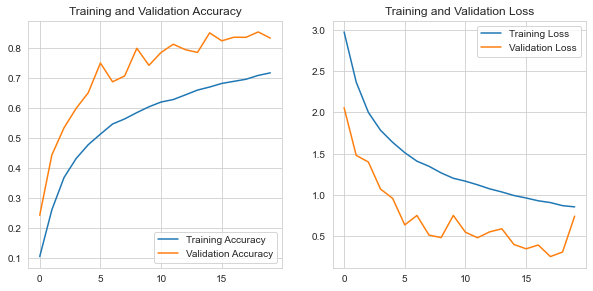

In [24]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc= history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2,2,2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Above graphs represents the visualization for the training performance of the first CNN model. At first, the process took approximately 6 epochs to converge to an optimal value on training. The training loss is also observed to decay smoothly over the epochs. The validation set however, is observed to be fluctuating a lot. This maybe due to large learning rate causing the model to overshoot the optima. 

### 5.4. Evaluating Accuracy
With the first model, prediction was made on the unseen test data by utilizing predict function.

In [25]:
pred1 = model1.predict(X_test)
pred1 = np.argmax(pred1, axis=1)
acc_score = accuracy_score(test_y, pred1)

print('Accuracy:', acc_score*100)

Accuracy: 56.63692136084774


Although the model resulted high accuracy on the training and validation set, it failed to perform well on the unseen data as the accuracy on the test data set was validated to be only 57%. This model is not very accurate on predicting the outcome labels.

## 6. Building Second Model

### 6.1. Data Augmentation
Similar to the first model, transformation has been applied to the training model to increase the diversity of the data.

In [26]:
train_datagen2 = ImageDataGenerator(
                    featurewise_center=False, samplewise_center=False,
                    featurewise_std_normalization=False, samplewise_std_normalization=False,zca_whitening=False, 
                    rescale=1/255, rotation_range=10, zoom_range=0.1, height_shift_range=0.1, width_shift_range=0.1,
                    horizontal_flip=False, vertical_flip=False)
valid_datagen2 = ImageDataGenerator(rescale=1/255)
test_datagen2 = ImageDataGenerator(rescale=1/255)


### 6.2. Callback
For the second model callback function has been applied. A callback is a set of functions to be applied at given stages of the training procedure and can be used to get a view on the internal states and statistics of the model during training. Callback is defined when you want to automate some tasks after every training/epoch that help you have controls over the training process. 
#### 6.2.1. ReduceLROnPlateau
For this project ReduceLROnPlateau was used to adjust the learning rates on instance of metric improvements. 
ReduceLROnPlateau allows to reduce learning rate when a metric has stopped improving.
Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduce. 


In [27]:
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

The second model type is also utilizing sequential API and is built similar to the first model. However, the additional third layer of Conv2D, Maxpooling2D and Dropout layers have been added to get better performance
### 6.3. Dropout regularization
In addition of the third layer, dropout regularization is added for the second model. Dropout is a technique where rendomly selected neurons are ignored during training. It randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
The effect of adding dropout layer is that the network becomes less sensitive to the specific weights of neurons and in turn is capable of better generalization and is less likely to overfit the training data.

In [28]:
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                activation ='relu', input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                activation ='relu'))
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                activation ='relu'))
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(25, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)        

Above figure represents the summary of the second sequential model.

### 6.4. Fitting the Second model
Similar to the first model, the fit function is applied with Training data, Target data, Validataion dataset and Number of epochs. The difference has been made in increasing number of epochs and increasing the batch_size. 
Since 20 epochs did not seem to lead the neural network to optimal solution, the second model is increased to 30. The consequence of increasing the number of epochs can result in over-fitting model however, by adding noise to different parts of the model (such as dropout and moderated batch size), it will help the learning algorithms to avoid overfitting even with large number of epochs.

In [29]:
history1 = model2.fit(train_datagen2.flow(X_train, Y_train, batch_size=128),
                    epochs = 30,
                    validation_data = valid_datagen2.flow(X_validate, Y_validate),
                    callbacks = [lr_reduction])

Epoch 1/30
172/172 [==============================] - 34s 195ms/step - loss: 3.1288 - accuracy: 0.0682 - val_loss: 2.8910 - val_accuracy: 0.1859
Epoch 2/30
172/172 [==============================] - 33s 193ms/step - loss: 2.2435 - accuracy: 0.2941 - val_loss: 1.4022 - val_accuracy: 0.6137
Epoch 3/30
172/172 [==============================] - 33s 193ms/step - loss: 1.4464 - accuracy: 0.5173 - val_loss: 0.6343 - val_accuracy: 0.7806
Epoch 4/30
172/172 [==============================] - 33s 193ms/step - loss: 1.0207 - accuracy: 0.6522 - val_loss: 0.3980 - val_accuracy: 0.8589
Epoch 5/30
172/172 [==============================] - 33s 192ms/step - loss: 0.7899 - accuracy: 0.7276 - val_loss: 0.2089 - val_accuracy: 0.9048
Epoch 6/30
172/172 [==============================] - 33s 194ms/step - loss: 0.6524 - accuracy: 0.7749 - val_loss: 0.3823 - val_accuracy: 0.9275
Epoch 7/30
172/172 [==============================] - 34s 197ms/step - loss: 0.5543 - accuracy: 0.8101 - val_loss: 0.2588 - val_ac

In above steps, it can be observed that the callback(ReduceLROnPlateau) reduced learning rate multiple times (during epoch 21, 24,26 and 29) as model performance stopped improving. The accuracy on the training set was finalized to be 96% and accuracy of validation set to be 99%. 

### 6.5. Evaluating Accuracy on Test data

In [30]:
pred2 = model2.predict(X_test)
pred2 = np.argmax(pred2, axis=1)
acc_score2 = accuracy_score(test_y, pred2)

print('Accuracy:', acc_score2*100)

Accuracy: 95.24539877300614


The accuracy attained from the second model was approximtely 95% on the test set data. With fine tuning on the second model,  the performance of the model improved significantly compared to the accuracy 57% on the first model. Applying additional dropout layer and callback function displayed extremely effective enhancement on the model.

### 6.6. Analyzing second model

#### 6.6.1. Visualization

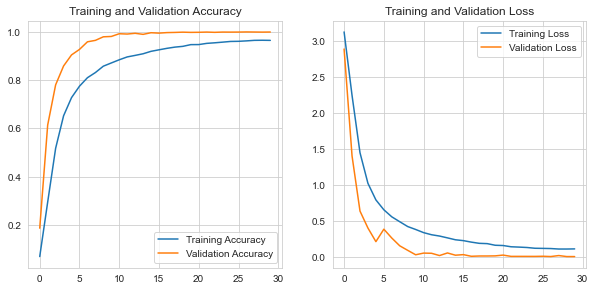

In [31]:
acc1 = history1.history['accuracy']
loss1 = history1.history['loss']
val_acc1 = history1.history['val_accuracy']
val_loss1 = history1.history['val_loss']

epochs = range(len(acc1))

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(epochs, acc1, label='Training Accuracy')
plt.plot(epochs, val_acc1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2,2,2)
plt.plot(epochs, loss1, label='Training Loss')
plt.plot(epochs, val_loss1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Accuracy graph is observed to be coverging from fifth epochs on both training and validation sets. The graph also displays smooth transition and does not fluctuate as much as compared to the first model. Therefore, hyperparameter tuning the model allowed the model to reduce the loss more smoothly and monotonically in addition to more quickly converge on both training and validation accuracy.

#### 6.6.2. Classification report
The sign language numbers are mapped into letters and displayed into classification report. The Precision, Recall and F1-score of each class are summarized in below figure:

In [32]:
y_test_letters = [letters[x] for x in test_y]
pred_letters = [letters[x] for x in pred2]

print(classification_report(y_test_letters, pred_letters))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       331
           B       1.00      0.81      0.90       432
           C       0.99      1.00      1.00       310
           D       0.95      0.99      0.97       245
           E       0.89      0.98      0.93       498
           F       1.00      1.00      1.00       247
           G       1.00      0.94      0.97       348
           H       1.00      1.00      1.00       436
           I       1.00      1.00      1.00       288
           K       0.95      0.99      0.97       331
           L       1.00      0.98      0.99       209
           M       0.98      1.00      0.99       394
           N       1.00      0.97      0.99       291
           O       0.87      1.00      0.93       246
           P       1.00      0.89      0.94       347
           Q       1.00      1.00      1.00       164
           R       0.99      0.68      0.81       144
           S       0.68    

#### 6.6.3. Confusion Matrix
The confusion matrix summarized below reveals that the accuracy suffers primarily due to the misclassification of specific letters(e.g. S and U) however, in general, it is observed that the model performed reasonaly well as majority of the class labels are predicted with score over 90%

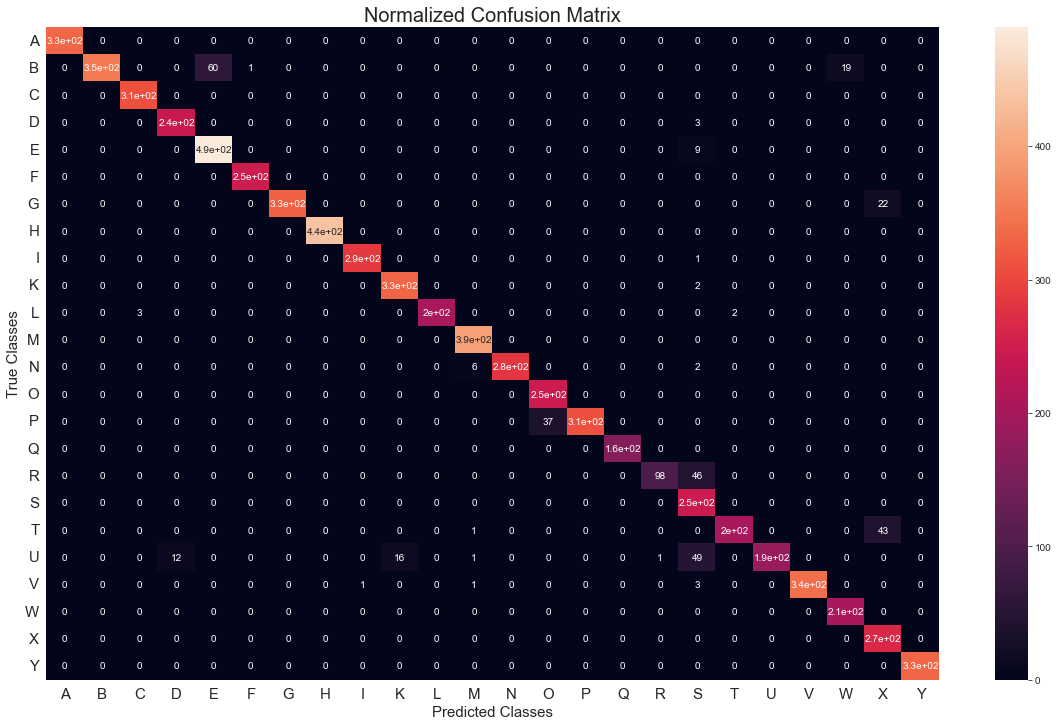

In [33]:
cm = confusion_matrix(test_y, pred2)
plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True, xticklabels = sorted(set(y_test_letters)), yticklabels = sorted(set(y_test_letters)))
plt.title('Normalized Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Classes', fontsize=15)
plt.ylabel('True Classes', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, rotation=0)
plt.show()

### 6.7. Sample Prediction outputs

First 15 predictions of the test sets are summarized in below visualization.

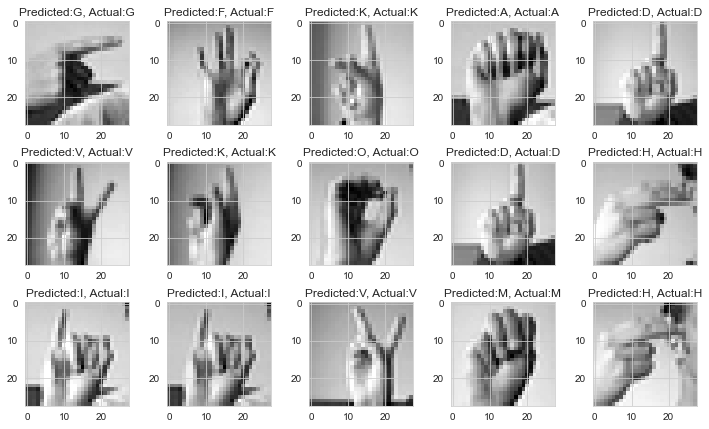

In [34]:
fig, ax=plt.subplots(3,5)
fig.set_size_inches(10,6)
k=0
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(X_test[k], cmap='gray')
        ax[i,j].set_title('Predicted:{}, Actual:{}'.format(pred_letters[k], y_test_letters[k]))
        k=k+1;
    plt.tight_layout()

As arranged above outputs, it can be seen that the CNN model has predicted all correct class labels for all the 15 images.

## 7. Conclusion

In conclusion, the final model of the Convolutional Neural Network has given outstanding performance in the classificaiton of American Sign Language images. The model evaluated based on 24 alphabetic sign languages which contained 27455 images in training dataset and 7172 images of test dataset. The training data-set was split in the ratio of 80:20 for training and validation respectively. It was observed that by implementing data augmentation, increaing the number of epochs, applying callback function and hyperparameter tuning has improved the performance of the model significantly as average accurcy score has increased from 57% to 95% from first model to second model respectively and was able to precict correctly on the first 15 class labels of the test dataset.